In [7]:
import torch
import torchvision
import numpy as np
from PIL import Image, ImageDraw


## Sementic segementation for image data

In [2]:
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)

image = Image.open("busy_street.jpg")

image_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((512, 512)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
image_tensor = image_transforms(image).unsqueeze(0)

model.eval()
with torch.no_grad():
    output = model(image_tensor)['out'][0]

output = output.argmax(0).byte().cpu().numpy()
output_image = Image.fromarray(output)

d:\MHC\2023\ds_venv\ds_edu\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\MHC\2023\ds_venv\ds_edu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\deeplabv3_resnet101_coco-586e9e4e.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

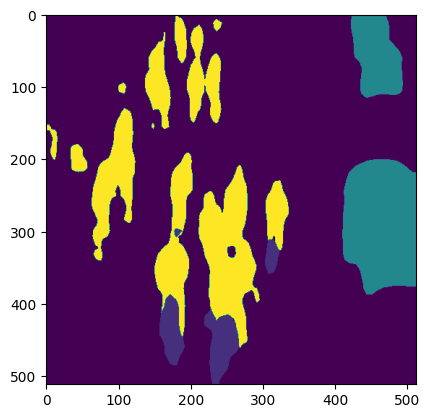

In [4]:
import matplotlib.pyplot as plt
plt.imshow(output_image)


## Instance segementation for image data


In [19]:
import torch
import torchvision
import numpy as np
from PIL import Image, ImageDraw

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

image = Image.open("busy_street.jpg")

image_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((512, 512)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
image_tensor = image_transforms(image)

model.eval()
with torch.no_grad():
    output = model([image_tensor])[0]

masks = output['masks'].squeeze().cpu().numpy()
labels = output['labels'].cpu().numpy()
scores = output['scores'].cpu().numpy()
boxes = output['boxes'].cpu().numpy()

mask_image = np.zeros((image.height, image.width), dtype=np.uint8)
for mask, label, score, box in zip(masks, labels, scores, boxes):
    if score > 0.2:
        mask = (mask > 0.5).astype(np.uint8)
        mask = Image.fromarray(mask)
        mask = mask.resize((image.width, image.height), resample=Image.BILINEAR)
        mask = np.array(mask)
        mask_image += mask
        draw = ImageDraw.Draw(image)
        draw.rectangle(box.tolist(), outline='red')
        draw.text((box[0], box[1]), str(label), fill='red')

mask_image = Image.fromarray(mask_image * 255)
mask_image.putalpha(128)
image.paste(mask_image, (0, 0), mask_image)

image.show()

In [ ]:
"""
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

image = Image.open("busy_street.jpg")

image_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((512, 512)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
image_tensor = image_transforms(image)

model.eval()
with torch.no_grad():
    output = model([image_tensor])[0]

masks = output['masks'].squeeze().cpu().numpy()
labels = output['labels'].cpu().numpy()
scores = output['scores'].cpu().numpy()

for mask, label, score in zip(masks, labels, scores):
    mask = (mask > 0.5).astype(np.uint8)
    mask_image = Image.fromarray(mask * 255)
    mask_image.show()
"""